# SMS Spam Classifier

In [1]:
import numpy as np 
import pandas as pd 
df = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding="latin1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Data Cleaning

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [3]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [4]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)

In [6]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Target'] = encoder.fit_transform(df['Target'])

In [8]:
df.sample(5)

,Target,Text
215,0,Finally the match heading towards draw as your...
2544,0,She is our sister.. She belongs 2 our family.....
5322,0,"Thanks, I'll keep that in mind"
2564,0,"Under the sea, there lays a rock. In the rock,..."
2880,0,Printer is cool. I mean groovy. Wine is groovying


In [9]:
df.shape

(5572, 2)

In [10]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [11]:
df.duplicated().sum()

403

In [12]:
df=df.drop_duplicates(keep='first')

In [13]:
df.shape

(5169, 2)

### EDA

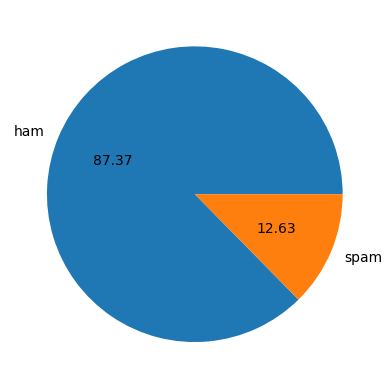

In [14]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [15]:
df['num_characters'] = df['Text'].apply(len)
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [16]:
# ham
df[df['Target'] == 0][['num_characters']].describe()

,num_characters
count,4516.000000
mean,70.459256
std,56.358207
min,2.000000
25%,34.000000
50%,52.000000
75%,90.000000
max,910.000000


In [17]:
# spam
df[df['Target'] == 1][['num_characters']].describe()

,num_characters
count,653.000000
mean,137.891271
std,30.137753
min,13.000000
25%,132.000000
50%,149.000000
75%,157.000000
max,224.000000


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

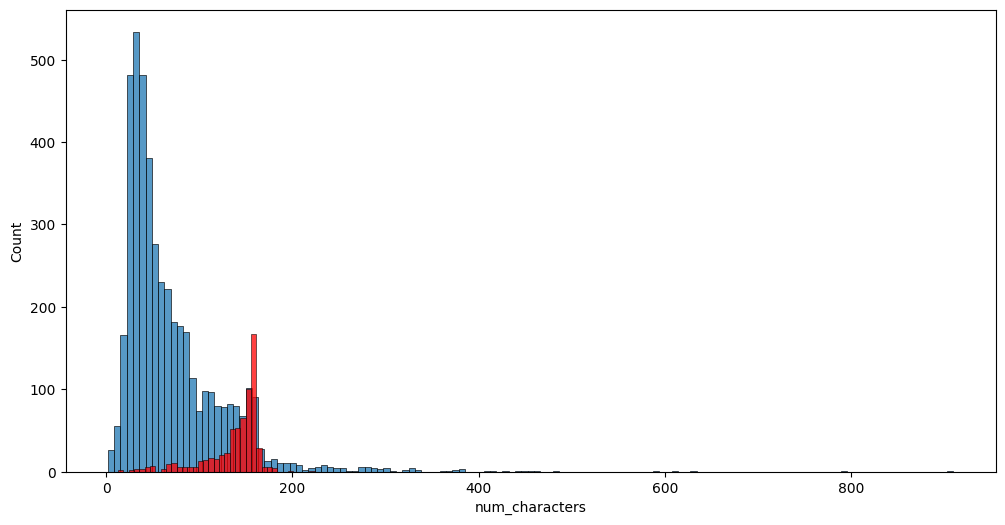

In [18]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0]['num_characters'])
sns.histplot(df[df['Target'] == 1]['num_characters'],color='red')

### Preprocessing

In [19]:
# Install spaCy and download the English model
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 24.8 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


#### Tokenization & Lemmatization & Stopword Removal

In [20]:
import spacy

# Load the English model
nlp = spacy.load('en_core_web_sm')

def preprocess_text(text):
    """
    Performs tokenization, lemmatization and stopword removal
    """
    # Process the text with spaCy
    doc = nlp(text)
    
    # Get tokens that aren't stopwords or punctuation
    tokens = [token.lemma_.lower() for token in doc 
             if not token.is_stop and not token.is_punct]
    
    return tokens

# Example usage
text = "I'm gonna be home soon and I don't want to talk about this stuff anymore tonight, k? I've cried enough today."
processed_tokens = preprocess_text(text)
print("Original:", text)
print("Processed:", processed_tokens)

Original: I'm gonna be home soon and I don't want to talk about this stuff anymore tonight, k? I've cried enough today.
Processed: ['go', 'to', 'home', 'soon', 'want', 'talk', 'stuff', 'anymore', 'tonight', 'k', 'cry', 'today']


In [21]:
df['processed_text'] = df['Text'].apply(preprocess_text)

# Display a few examples
print("\nFirst few rows of processed text:")
print(pd.DataFrame({
    'Original': df['Text'].head(),
    'Processed': df['processed_text'].head()
}))


First few rows of processed text:
                                            Original  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                           Processed  
0  [jurong, point, crazy, available, bugis, n, gr...  
1                       [ok, lar, joke, wif, u, oni]  
2  [free, entry, 2, wkly, comp, win, fa, cup, fin...  
3                         [u, dun, early, hor, u, c]  
4                        [nah, think, go, usf, live]  


#### Tfidf Vectorisation

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

# First, convert the tokens back to strings because TfidfVectorizer expects string input
df['text_for_tfidf'] = df['processed_text'].apply(lambda x: ' '.join(x))

# Initialize and fit the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text_for_tfidf'])

# Get feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert to DataFrame for better visualization
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=feature_names
)

# Display some information
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)
print("\nNumber of features (unique words):", len(feature_names))
print("\nFirst few features:", list(feature_names)[:10])

# Display first few rows of TF-IDF values
print("\nSample of TF-IDF values:")
print(tfidf_df.head())



TF-IDF Matrix Shape: (5169, 7598)

Number of features (unique words): 7598

First few features: ['00', '000', '000pes', '008704050406', '0089', '0121', '01223585236', '01223585334', '0125698789', '02']

Sample of TF-IDF values:
    00  000  000pes  008704050406  0089  0121  01223585236  01223585334  \
0  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
1  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
2  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
3  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
4  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   

   0125698789   02  ...   ìï   ó_  û_thank  ûªm  ûªt  ûªve   ûï  ûïharry   ûò  \
0         0.0  0.0  ...  0.0  0.0      0.0  0.0  0.0   0.0  0.0      0.0  0.0   
1         0.0  0.0  ...  0.0  0.0      0.0  0.0  0.0   0.0  0.0      0.0  0.0   
2         0.0  0.0  ...  0.0  0.0      0.0  0.0  0.0   0.0  0.0      0.0  0.0 

In [23]:
df.head()

,Target,Text,num_characters,processed_text,text_for_tfidf
0,0,"Go until jurong point, crazy.. Available only ...",111,"[jurong, point, crazy, available, bugis, n, gr...",jurong point crazy available bugis n great wor...
1,0,Ok lar... Joking wif u oni...,29,"[ok, lar, joke, wif, u, oni]",ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,"[u, dun, early, hor, u, c]",u dun early hor u c
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[nah, think, go, usf, live]",nah think go usf live


## ML Models

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [44]:
# Define features (X) and target labels (y)
X = tfidf_matrix  # TF-IDF features
y = df['Target']   # Your target labels

# Split into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


#### Naive Bayes

In [45]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naïve Bayes Accuracy: 0.9642166344294004
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       903
           1       1.00      0.72      0.84       131

    accuracy                           0.96      1034
   macro avg       0.98      0.86      0.91      1034
weighted avg       0.97      0.96      0.96      1034



#### SVM

In [27]:
svm_model = SVC(kernel='linear')  # Linear kernel works well for text data
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.97678916827853
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       903
           1       0.99      0.82      0.90       131

    accuracy                           0.98      1034
   macro avg       0.98      0.91      0.94      1034
weighted avg       0.98      0.98      0.98      1034



#### Logistic Regression

In [28]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.9506769825918762
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       903
           1       1.00      0.61      0.76       131

    accuracy                           0.95      1034
   macro avg       0.97      0.81      0.87      1034
weighted avg       0.95      0.95      0.95      1034



In [46]:
# Define ANN model
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(7598,)),  # Input layer
    Dropout(0.3),  # Dropout for regularization
    Dense(64, activation='relu'),  # Hidden layer
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
ann_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ann_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate model
y_pred_ann = (ann_model.predict(X_test) > 0.5).astype("int32")

print("ANN Accuracy:", accuracy_score(y_test, y_pred_ann))
print(classification_report(y_test, y_pred_ann))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8636 - loss: 0.4690 - val_accuracy: 0.9555 - val_loss: 0.1409
Epoch 2/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9807 - loss: 0.0931 - val_accuracy: 0.9778 - val_loss: 0.0619
Epoch 3/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9960 - loss: 0.0184 - val_accuracy: 0.9787 - val_loss: 0.0575
Epoch 4/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9987 - loss: 0.0088 - val_accuracy: 0.9797 - val_loss: 0.0686
Epoch 5/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9991 - loss: 0.0033 - val_accuracy: 0.9787 - val_loss: 0.0702
Epoch 6/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.9807 - val_loss: 0.0777
Epoch 7/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9998 - loss: 0.0010 - val_accuracy: 0.9797 - val_loss: 0.0825
Epoch 8/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy:

### Word2Vec

In [29]:
import numpy as np
import pandas as pd
import gensim
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report



In [30]:
# Convert processed text to list of lists
sentences = df['processed_text'].tolist()  # Assuming 'processed_text' contains tokenized text


In [31]:
# Train Word2Vec model
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)


In [32]:
# Function to get the average Word2Vec vector for a sentence
def get_sentence_embedding(sentence, model, vector_size=100):
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(vector_size)

# Apply function to entire dataset
X_word2vec = np.array([get_sentence_embedding(sentence, w2v_model, 100) for sentence in sentences])


In [33]:
y = df['Target']  # Target labels
X_train, X_test, y_train, y_test = train_test_split(X_word2vec, y, test_size=0.2, random_state=42, stratify=y)


In [37]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naïve Bayes Accuracy: 0.47678916827852996
              precision    recall  f1-score   support

           0       0.94      0.43      0.59       903
           1       0.17      0.80      0.28       131

    accuracy                           0.48      1034
   macro avg       0.55      0.62      0.43      1034
weighted avg       0.84      0.48      0.55      1034



In [38]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.8733075435203095
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       903
           1       0.00      0.00      0.00       131

    accuracy                           0.87      1034
   macro avg       0.44      0.50      0.47      1034
weighted avg       0.76      0.87      0.81      1034



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.8733075435203095
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       903
           1       0.00      0.00      0.00       131

    accuracy                           0.87      1034
   macro avg       0.44      0.50      0.47      1034
weighted avg       0.76      0.87      0.81      1034



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [42]:
# Define ANN model
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(100,)),  # Input layer
    Dropout(0.3),  # Dropout for regularization
    Dense(64, activation='relu'),  # Hidden layer
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
ann_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ann_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate model
y_pred_ann = (ann_model.predict(X_test) > 0.5).astype("int32")

print("ANN Accuracy:", accuracy_score(y_test, y_pred_ann))
print(classification_report(y_test, y_pred_ann))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8732 - loss: 0.4444 - val_accuracy: 0.8733 - val_loss: 0.3841
Epoch 2/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8793 - loss: 0.3827 - val_accuracy: 0.8733 - val_loss: 0.3778
Epoch 3/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8778 - loss: 0.3741 - val_accuracy: 0.8733 - val_loss: 0.3705
Epoch 4/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8682 - loss: 0.3902 - val_accuracy: 0.8733 - val_loss: 0.3711
Epoch 5/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8700 - loss: 0.3833 - val_accuracy: 0.8733 - val_loss: 0.3720
Epoch 6/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8672 - loss: 0.3917 - val_accuracy: 0.8733 - val_loss: 0.3657
Epoch 7/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8708 - loss: 0.3738 - val_accuracy: 0.8733 - val_loss: 0.3659
Epoch 8/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8754 - loss: 0.3685 - val_accuracy: 0.8733 - val_

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
